In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

In [2]:
heart_disease_data = pd.read_csv('heart.csv')

In [3]:
heart_disease_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_disease_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
heart_disease_data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [7]:
y = heart_disease_data.drop(columns=['HeartDisease'], axis=1)
X = heart_disease_data.drop(['HeartDisease'], axis = 1)

In [8]:
# Transform Chest Pain Type
def changeChestPainType(ChestPainType):
    if ChestPainType == "ASY":
        return 0
    elif ChestPainType == "NAP":
        return 1
    elif ChestPainType == "ATA":
        return 2
    else:
        return 3

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['ChestPainType'] = heart_disease_data['ChestPainType'].apply(changeChestPainType)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,1,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,2,130,283,0,ST,98,N,0.0,Up,0
3,48,F,0,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,1,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# Transform Resting ECG
def changeRestingECG(RestingECG):
    if RestingECG == "Normal":
        return 0
    elif RestingECG == "LVH":
        return 1
    else:
        return 2

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['RestingECG'] = heart_disease_data['RestingECG'].apply(changeRestingECG)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,0,172,N,0.0,Up,0
1,49,F,1,160,180,0,0,156,N,1.0,Flat,1
2,37,M,2,130,283,0,2,98,N,0.0,Up,0
3,48,F,0,138,214,0,0,108,Y,1.5,Flat,1
4,54,M,1,150,195,0,0,122,N,0.0,Up,0


In [10]:
# Transform ST SLope
def changeST_Slope(ST_Slope):
    if ST_Slope == "Flat":
        return 0
    elif ST_Slope == "Up":
        return 1
    else:
        return 2

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['ST_Slope'] = heart_disease_data['ST_Slope'].apply(changeST_Slope)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,0,172,N,0.0,1,0
1,49,F,1,160,180,0,0,156,N,1.0,0,1
2,37,M,2,130,283,0,2,98,N,0.0,1,0
3,48,F,0,138,214,0,0,108,Y,1.5,0,1
4,54,M,1,150,195,0,0,122,N,0.0,1,0


In [11]:
# Transform Sex
def changeSex(sex):
    if sex == "M":
        return 0
    
    else:
        return 1

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['Sex'] = heart_disease_data['Sex'].apply(changeSex)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,N,0.0,1,0
1,49,1,1,160,180,0,0,156,N,1.0,0,1
2,37,0,2,130,283,0,2,98,N,0.0,1,0
3,48,1,0,138,214,0,0,108,Y,1.5,0,1
4,54,0,1,150,195,0,0,122,N,0.0,1,0


In [12]:
# Transform ExerciseAngina
def changeExerciseAngina(ExerciseAngina):
    if ExerciseAngina == "Y":
        return 0
    
    else:
        return 1

heart_disease_data['ExerciseAngina'] = heart_disease_data['ExerciseAngina'].apply(changeExerciseAngina)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,1,0.0,1,0
1,49,1,1,160,180,0,0,156,1,1.0,0,1
2,37,0,2,130,283,0,2,98,1,0.0,1,0
3,48,1,0,138,214,0,0,108,0,1.5,0,1
4,54,0,1,150,195,0,0,122,1,0.0,1,0


In [13]:
y = heart_disease_data['HeartDisease']
X = heart_disease_data.drop(['HeartDisease'], axis = 1)
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [14]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,1,0.0,1
1,49,1,1,160,180,0,0,156,1,1.0,0
2,37,0,2,130,283,0,2,98,1,0.0,1
3,48,1,0,138,214,0,0,108,0,1.5,0
4,54,0,1,150,195,0,0,122,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,1,1.2,0
914,68,0,0,144,193,1,0,141,1,3.4,0
915,57,0,0,130,131,0,0,115,0,1.2,0
916,57,1,2,130,236,0,1,174,1,0.0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
heart_disease_data.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [17]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [18]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Linear Regression

In [19]:
model = LinearRegression()

In [20]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5079445212217379
Testing Score: 0.574348275467222


In [21]:
#Quantifying our model by performing MSE and R2 score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 0.11816820462165098
R-squared (R2): 0.5218783269081227


In [22]:
#As we can see from above, the MSE score is not close to one, and the R2 score is low

k: 1, Train/Test Score: 1.000/0.842
k: 3, Train/Test Score: 0.903/0.908
k: 5, Train/Test Score: 0.873/0.913
k: 7, Train/Test Score: 0.875/0.918
k: 9, Train/Test Score: 0.873/0.918
k: 11, Train/Test Score: 0.868/0.924
k: 13, Train/Test Score: 0.864/0.913
k: 15, Train/Test Score: 0.868/0.902
k: 17, Train/Test Score: 0.868/0.913
k: 19, Train/Test Score: 0.861/0.908


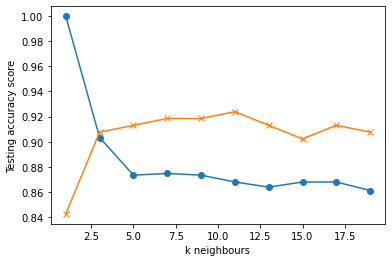

In [23]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbours")
plt.ylabel("Testing accuracy score")
plt.show()

In [24]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.918


In [25]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [26]:
input_data = (38,0,1,138,175,0,0,173,1,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
input_data_reshape

array([[ 38.,   0.,   1., 138., 175.,   0.,   0., 173.,   1.,   0.,   1.]])

In [27]:

#standardise the data
std_data = X_scaler.transform(input_data_reshape)
prediction = knn.predict(std_data)


if (prediction[0] ==0):
    print("The person does not have parkinsons")
else:
    print("The person has parkinsons")

The person does not have parkinsons


C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [29]:
classifier.fit(X_train, y_train)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
classifier.fit(X_train, y_train)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [31]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8474114441416893
Testing Data Score: 0.8804347826086957


In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[67,  7],
       [15, 95]], dtype=int64)

In [33]:
# COnfusion matrix accuracy score
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8804347826086957


SVM

In [34]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.902


In [36]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            ))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        74
           1       0.93      0.91      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [38]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.902


In [41]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [42]:
accuracy = grid_search.best_score_
accuracy

0.8447982228804147

In [43]:
#strange findings after hypertuning SVC model to find a score lower than one with the basic hyperparameters

Decision Tree

In [55]:
clf = DecisionTreeClassifier(random_state=0 )
clf = clf.fit(X_train, y_train)

In [56]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [57]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [58]:
accuracy_score(y_test, predictions)

0.8152173913043478

In [59]:
confusion_matrix(y_test, predictions, labels=[0,1])

array([[64, 10],
       [24, 86]], dtype=int64)

In [ ]:
#Decision tree hyperparameters

K means

In [62]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=11))
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customise metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
23/23 [==============================] - 0s 999us/step - loss: 0.6656 - accuracy: 0.5572
Epoch 2/50
23/23 [==============================] - 0s 838us/step - loss: 0.5611 - accuracy: 0.7629
Epoch 3/50
23/23 [==============================] - 0s 932us/step - loss: 0.4842 - accuracy: 0.8174
Epoch 4/50
23/23 [==============================] - 0s 856us/step - loss: 0.4319 - accuracy: 0.8324
Epoch 5/50
23/23 [==============================] - 0s 866us/step - loss: 0.3967 - accuracy: 0.8392
Epoch 6/50
23/23 [==============================] - 0s 910us/step - loss: 0.3775 - accuracy: 0.8515
Epoch 7/50
23/23 [==============================] - 0s 916us/step - loss: 0.3647 - accuracy: 0.8529
Epoch 8/50
23/23 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8583
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8597
Epoch 10/50
23/23 [==============================] - 0s 1ms/st